In [3]:
import pandas as pd

A = pd.read_json("final.json")
df=pd.DataFrame(A, columns=[ 'percin', 'percat', 
       'difresperc', 'qualymes',  'minperc',
        'final']) ##columns=[]
A.columns
df.columns



Index(['percin', 'percat', 'difresperc', 'qualymes', 'minperc', 'final'], dtype='object')

In [4]:
X=df[df.columns[:-1]]
Y=df[df.columns[-1:]]



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

print(len(X_train),len(X_test))

254 64


In [6]:
from sklearn.linear_model import LinearRegression

funcao_regressao=LinearRegression()

funcao_regressao.fit(X_train,Y_train)




LinearRegression()

In [7]:
funcao_regressao.score(X_train, Y_train)

0.10865586746614764

In [8]:
Previsoes= funcao_regressao.predict(X_test)
import numpy as np
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, Previsoes)))

RMSE 6.793823446785944


In [9]:
'''
print(funcao_regressao.predict([[1.0]]));
'''

'\nprint(funcao_regressao.predict([[1.0]]));\n'

In [10]:
import statsmodels.api as sm

est=sm.OLS(Y,X).fit()
est.params

C:\Users\linka\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


percin        -9.608495
percat         9.597487
difresperc     0.763550
qualymes      -0.000105
minperc      -10.567601
dtype: float64

In [11]:
est.rsquared_adj

0.9548419390482822

In [12]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  final   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1346.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):                   3.41e-209
Time:                        21:50:35   Log-Likelihood:                         -355.32
No. Observations:                 318   AIC:                                      720.6
Df Residuals:                     313   BIC:                                      739.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
percin        -9.6085      0.266    -36.174      0.000     -10.131      -9.086
percat         9.5975      0.264     36.392      0.000       9.079      10.116
difresperc     0.7636      0.089      8.560      0.000       0.588       0.939
qualymes      -0.0001    1.8e-05     -5.832      0.000      -0.000   -6.95e-05
minperc      -10.5676      0.524    -20.180      0.000     -11.598      -9.537
==============================================================================
Omnibus:                       93.485   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3505.906
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                      19.251   Cond. No.                     4.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
resultado= est.predict()
resultado
#print (pd.crosstab(Y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

array([-1.41240110e-01, -2.68611825e-01, -4.10973314e-02, -1.48215321e-01,
       -6.83039300e-01, -5.47587314e-01, -2.89684301e-01, -5.48405787e-01,
       -4.65057718e-01, -3.81472449e-01, -2.50903698e-01, -5.00287366e-01,
       -8.81057360e-01, -6.82144623e-01,  1.08553530e+00,  2.32710941e-02,
        1.46480593e-01, -2.67892213e-01, -4.54504897e-01, -4.34648744e-01,
       -2.14546107e-01, -4.70883383e-01, -5.01661308e-01, -1.52360853e-01,
       -8.71874284e-01, -1.10431432e-01, -2.78520220e-01, -4.19359690e-01,
       -5.71252982e-01, -3.87540566e-02, -2.84421167e-01,  2.23344366e-01,
       -3.00781365e+00, -5.38195982e-01, -5.21550298e-01, -2.80360416e-01,
       -3.97233549e-01, -6.20636932e-01,  2.18553190e-01, -2.55538926e-01,
       -3.48632309e-01, -6.46588369e-01, -4.08056065e-01, -3.08399006e-01,
       -2.31069498e+00,  1.06717967e+00, -5.39253209e-01, -3.48606263e-01,
       -3.75945893e-01,  5.15647757e-02, -2.39619998e-01, -4.79063376e-01,
       -3.29219529e-01, -

In [14]:
quantos=318
for index in range(quantos):
    qualcry= pd.DataFrame(A, columns=['cry'],index=[index])
    qualtava= pd.DataFrame(A, columns=['final'],index=[index])
    print(qualcry, qualtava,resultado[index])


     cry
0  1INCH    final
0 -0.362 -0.1412401096503444
    cry
1  AAVE    final
1 -0.312 -0.2686118246733358
   cry
2  ACA    final
2 -0.668 -0.0410973313877534
   cry
3  ACH    final
3 -0.619 -0.14821532135841053
   cry
4  ACM    final
4  0.021 -0.6830393001238377
   cry
5  ADA    final
5  -0.57 -0.5475873138266714
   cry
6  ADX    final
6 -0.574 -0.28968430104121623
    cry
7  AGLD    final
7 -0.093 -0.5484057866437766
    cry
8  AION    final
8 -0.292 -0.4650577181307156
    cry
9  AKRO    final
9 -0.296 -0.3814724486743728
     cry
10  ALCX     final
10 -0.316 -0.2509036976596164
     cry
11  ALGO     final
11 -0.495 -0.500287366269443
      cry
12  ALICE     final
12 -0.266 -0.8810573595407334
       cry
13  ALPACA     final
13 -0.262 -0.6821446227723014
      cry
14  ALPHA     final
14 -0.363 1.0855352982212167
    cry
15  AMP     final
15    0.1 0.023271094066807052
    cry
16  ANC     final
16 -0.785 0.14648059285028125
     cry
17  ANKR     final
17 -0.066 -0.2678922128889098

Text(0, 0.5, 'final')

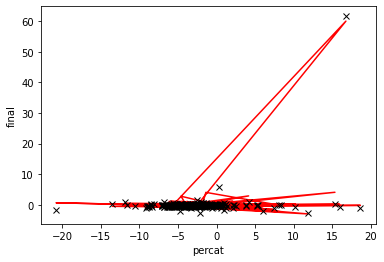

In [15]:

import matplotlib.pyplot as plt
##plt.figure(figsize=(10,10))
##plt.scatter(X_train, Y_train)
##plt.plot(X_test, funcao_regressao.predict(X_test), color='red')
plt.plot(df['percat'], est.predict(),'r-', label='predicted' )
plt.plot(df['percat'], df['final'], 'kx', label='data'  )
plt.xlabel('percat')
plt.ylabel('final')